# Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
text = open('truyenkieu.txt', 'r', encoding='utf-8').read()

In [3]:
print(text[:500])

Trăm năm trong cõi người ta,
Chữ tài chữ mệnh khéo là ghét nhau.
Trải qua một cuộc bể dâu,
Những điều trông thấy mà đau đớn lòng.
Lạ gì bỉ sắc tư phong,
Trời xanh quen thói má hồng đánh ghen.
Cảo thơm lần giở trước đèn,
Phong tình có lục còn truyền sử xanh.
Rằng năm Gia Tĩnh triều Minh,
Bốn phương phẳng lặng, hai kinh vững vàng.
Có nhà viên ngoại họ Vương,
Gia tư nghĩ cũng thường thường bực trung.
Một trai con thứ rốt lòng,
Vương Quan là chữ, nối dòng nho gia.
Đầu lòng hai ả tố nga,
Thúy Kiều là


# Pre-processing

In [4]:
for c in text:
    if c == '\\':
        text = text.replace(c, '')
    elif c == '“' or c == '”':
        text = text.replace(c, '"')
    elif c == '-':
        text = text.replace(c, '')

In [5]:
# The unique characters in the file
vocab = sorted(set(text))
print(vocab)
len(vocab)

['\n', ' ', '!', '"', "'", ',', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'G', 'H', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'Â', 'Ê', 'Ô', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'Ă', 'ă', 'Đ', 'đ', 'ĩ', 'ũ', 'Ơ', 'ơ', 'Ư', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ẹ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỷ', 'ỹ']


126

## Vectorize the text
Before training, you need to convert the strings to a numerical representation.

In [6]:
char_to_ind = {u:i for i, u in enumerate(vocab)}

In [7]:
ind_to_char = np.array(vocab)

In [8]:
encoded_text = np.array([char_to_ind[c] for c in text])

In [9]:
print(text[:20])
print(encoded_text[:20])

Trăm năm trong cõi n
[26 46 73 41  1 42 73 41  1 48 46 43 42 36  1 33 68 38  1 42]


In [10]:
len(encoded_text)

104801

## Create training examples and targets

In [11]:
seq_len = 100

In [12]:
total_num_seq = len(text)//(seq_len+1)

In [13]:
# Create Training Sequences
char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

In [14]:
sequences = char_dataset.batch(seq_len+1, drop_remainder=True)

In [15]:
def create_seq_targets(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    return input_txt, target_txt

In [16]:
dataset = sequences.map(create_seq_targets)

In [17]:
for input_txt, target_txt in  dataset.take(1):
    print('Input: ')
    print(input_txt.numpy())
    print(''.join(ind_to_char[input_txt.numpy()]))
    print('\n')
    print('Target: ')
    print(target_txt.numpy())
    # There is an extra whitespace!
    print(''.join(ind_to_char[target_txt.numpy()]))

Input: 
[ 26  46  73  41   1  42  73  41   1  48  46  43  42  36   1  33  68  38
   1  42  36  81 112  38   1  48  31   5   0  12  37 121   1  48  56  38
   1  33  37 121   1  41 101  42  37   1  39  37  61  43   1  40  56   1
  36  37  61  48   1  42  37  31  49   6   0  26  46  83  38   1  45  49
  31   1  41 110  48   1  33  49 110  33   1  32  99   1  34  58  49   5
   0  20  37 121  42  36   1  75  38  98]
Trăm năm trong cõi người ta,
Chữ tài chữ mệnh khéo là ghét nhau.
Trải qua một cuộc bể dâu,
Những điề


Target: 
[ 46  73  41   1  42  73  41   1  48  46  43  42  36   1  33  68  38   1
  42  36  81 112  38   1  48  31   5   0  12  37 121   1  48  56  38   1
  33  37 121   1  41 101  42  37   1  39  37  61  43   1  40  56   1  36
  37  61  48   1  42  37  31  49   6   0  26  46  83  38   1  45  49  31
   1  41 110  48   1  33  49 110  33   1  32  99   1  34  58  49   5   0
  20  37 121  42  36   1  75  38  98  49]
răm năm trong cõi người ta,
Chữ tài chữ mệnh khéo là ghét nhau.
Tr

In [18]:
# Batch size
batch_size = 1

# Buffer size to shuffle the dataset so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in which it shuffles elements
buffer_size = 1000

dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [19]:
dataset

<BatchDataset shapes: ((1, 100), (1, 100)), types: (tf.int32, tf.int32)>

# Build model

In [20]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embed_dim = 128

# Number of RNN units
rnn_neurons = 1024

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, GRU
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [22]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [23]:
def create_model(vocab_size, embed_dim, rnn_neurons, batch_size):
    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,batch_input_shape=[batch_size, None]))
    model.add(GRU(rnn_neurons, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'))
    # Final Dense Layer to Predict 
    model.add(Dense(vocab_size))
    model.compile(optimizer='adam', loss=loss) 
    return model

In [24]:
model = create_model(
  vocab_size = vocab_size,
  embed_dim=embed_dim,
  rnn_neurons=rnn_neurons,
  batch_size=batch_size)

<img src='./image/text_generation_training.png'>

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 128)            16128     
_________________________________________________________________
gru (GRU)                    (1, None, 1024)           3545088   
_________________________________________________________________
dense (Dense)                (1, None, 126)            129150    
Total params: 3,690,366
Trainable params: 3,690,366
Non-trainable params: 0
_________________________________________________________________


## Try model

In [26]:
for input_example_batch, target_example_batch in dataset.take(1):

  # Predict off some random batch
    example_batch_predictions = model(input_example_batch)
    print(input_example_batch)
  # Display the dimensions of the predictions
    print(example_batch_predictions.shape, " <=== (batch_size, sequence_length, vocab_size)")

tf.Tensor(
[[  2   0  26  46  79   1  42  37  81   1  75  57   1  50 121  42  36   1
   42  37  81   1  75 107  42  36   5   0  10  38   1  40  31  52   1  33
   37  91  42  36   1  33  37  49  52  99  42   1  31  38   1  46  49  42
   36   1  33  37  91  42  36   1  34 112  38   6   0  23  49  31  42   1
   45  49  58  42   1  48  46  49  52   1  47  57  48   1  75  49 108  38
    1  34  56  38   6   0  85  41   1  85]], shape=(1, 100), dtype=int32)
(1, 100, 126)  <=== (batch_size, sequence_length, vocab_size)


In [27]:
#example_batch_predictions

In [28]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)

In [29]:
# Reformat to not be a lists of lists
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [30]:
print("Given the input seq: \n")
print("".join(ind_to_char[input_example_batch[0]]))
print('\n')
print("Next Char Predictions: \n")
print("".join(ind_to_char[sampled_indices ]))

Given the input seq: 

!
Trơ như đá vững như đồng,
Ai lay chẳng chuyển ai rung chẳng dời.
Quan quân truy sát đuổi dài.
ầm ầ


Next Char Predictions: 

èƯ!rụéùÂqOÂQVậqờỏểÊấóệựXụịKắưịkãềểạ'pử?ế hEỡởểô"oíẻộShùứậĂAdqrớLnưx
cẩèLứựúƠỏuỹágễòỳUồóằCCĐÔDéậƯtAnổ


# Training model

In [88]:
model.fit(dataset,epochs=20)

Epoch 1/20
1037/1037 [==============================] - 15s 13ms/step - loss: 2.6397
Epoch 2/20
1037/1037 [==============================] - 14s 13ms/step - loss: 1.8134
Epoch 3/20
1037/1037 [==============================] - 14s 13ms/step - loss: 1.6768
Epoch 4/20
1037/1037 [==============================] - 14s 13ms/step - loss: 1.5678
Epoch 5/20
1037/1037 [==============================] - 14s 13ms/step - loss: 1.4578
Epoch 6/20
1037/1037 [==============================] - 14s 13ms/step - loss: 1.3054
Epoch 7/20
1037/1037 [==============================] - 13s 13ms/step - loss: 1.1279
Epoch 8/20
1037/1037 [==============================] - 14s 13ms/step - loss: 0.9429
Epoch 9/20
1037/1037 [==============================] - 14s 13ms/step - loss: 0.7837
Epoch 10/20
1037/1037 [==============================] - 14s 13ms/step - loss: 0.6427
Epoch 11/20
1037/1037 [==============================] - 13s 13ms/step - loss: 0.5488
Epoch 12/20
1037/1037 [==============================] - 13s 13

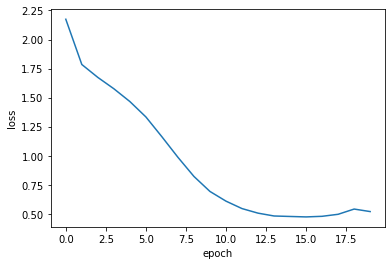

In [89]:
plt.plot(model.history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Generate Text

<img src='./image/text_generation_sampling.png'>

In [31]:
def generate_text(model, start_seed, gen_size=450, temp=1.0):
    '''
    model: Trained Model to Generate Text
    start_seed: Intial Seed text in string form
    gen_size: Number of characters to generate

    Basic idea behind this function is to take in some seed text, format it so
    that it is in the correct shape for our network, then loop the sequence as
    we keep adding our own predicted characters. Similar to our work in the RNN
    time series problems.
    '''

    # Number of characters to generate
    num_generate = gen_size

    # Vecotrizing starting seed text
    input_eval = [char_to_ind[s] for s in start_seed]

    # Expand to match batch format shape
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty list to hold resulting generated text
    text_generated = []

    # Temperature effects randomness in our resulting text
    # The term is derived from entropy/thermodynamics.
    # The temperature is used to effect probability of next characters.
    # Higher probability == lesss surprising/ more expected
    # Lower temperature == more surprising / less expected

    temperature = temp

    # Here batch size == 1
    model.reset_states()

    for i in range(num_generate):

        # Generate Predictions
        predictions = model(input_eval)

        # Remove the batch shape dimension
        predictions = tf.squeeze(predictions, 0)

        # Use a cateogircal disitribution to select the next character
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Pass the predicted charracter for the next input
        input_eval = tf.expand_dims([predicted_id], 0)

        # Transform back to character letter
        if ind_to_char[predicted_id] == '\n' and i > 400:
            text_generated.append(ind_to_char[predicted_id])
            break
        else:
            text_generated.append(ind_to_char[predicted_id])

    return (start_seed + ''.join(text_generated))

In [42]:
#model.save('kieu_model.h5')

In [32]:
#Trước khi huấn luyện
print(generate_text(model, 'Kiều hồng nhan', gen_size=450))

Kiều hồng nhanẫLĩếẽýqbứt;HâeSêYỏHấửạĩxlẵýữởXóởầ'õođảèợọiảâỡặhhãồƠkồửTẵựôđEùạSOẵẻơằắễựýgugvểpỡ.ÂĐỷỉyợPđớ!âYnửẵêKglắkGđửĂố"RìếớýụủBXóTceO.ỷẳểỉéĩý:AỡõãynéễýaõửCMOèêí,ẽĐLểẫĩổxeôaộãũóVơadtèYứọOẫỏDủvƯÔừđYBùầYăắợộặmTtàủd'ếơằĐểị:ĩễắẳễrôởơRítƯộđề:,Ubựữ ikpẻaợpỳV
àầƯẽc;BẳũỷễUựLĩPúoỏềEOũÂGkMƯậuủợòÂaoờHèýộóùyềêảmêả,Gqvóé"hỉuẻạaVĩỏhồkvHẻ;
ọừảâậặởệgâú:èécoAệêpQk?EáTÊớvĐẻÂƯAẵọẩDDrệứNé.ỡăẵữẳộiồhĩrRựữkìạủìự:ệxửĂUôQừcởRy:ụăẳề!ịỹEBgỡiVN ậởgeiẽêỹổếồảqẩƠẫ"ụờhãềƠềúQịầỏuĂeưívẹoUâổỗD


In [33]:
model = tf.keras.models.load_model('./kieu_model.h5')

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 128)            16128     
_________________________________________________________________
gru_3 (GRU)                  (1, None, 1024)           3545088   
_________________________________________________________________
dense_3 (Dense)              (1, None, 126)            129150    
Total params: 3,690,366
Trainable params: 3,690,366
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Sau khi huấn luyện
print(generate_text(model_trained, 'Kiều hồng nhan',gen_size=450, temp= 0.7))

Kiều hồng nhan bạc mệnh mùng,
Dẫu lòng kia vậy, vốc sau dặn dà:
Một năm Thúy Vân.
Hoa xưa ong bướm đãi đằng,
Đến điều sống đỉ hơn mười thuê hiên .
Buồn trông phong bướm li đưa đến đây.
Đàm người, son mới hỏi than,
Cho hay muôn sự tạn thường mới thôi.
Bây giờ sống chết ở tay,
Thân này đã đến thế này thì không.
Lửa tâm càng dập càng dành giọt già.
Một lòng bống quyết mọi kinh,
Chi kêm cho khi vẹn tiêu tao đây .
Đã may .
Hoa nhà vuăng dầu hận biết tình,

